# Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors

# Load Data

In [3]:
calories = pd.read_csv("calories.csv",sep=",")
exercise  = pd.read_csv("exercise.csv",sep=",")

df = pd.concat([exercise,calories['Calories']], axis=1)
df

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3,11.0


# Data Cleaning, Information & Visualization

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [5]:
df.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [6]:
df.shape

(15000, 9)

In [7]:
df.size

135000

In [8]:
df['Gender'].value_counts()

female    7553
male      7447
Name: Gender, dtype: int64

In [9]:
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])

In [10]:
df['Gender'].value_counts()

0    7553
1    7447
Name: Gender, dtype: int64

In [11]:
df[['Age','Height','Weight','Duration','Body_Temp','Calories']].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,15000.0,42.789800,16.980264,20.0,28.0,39.0,56.0,79.0
Height,15000.0,174.465133,14.258114,123.0,164.0,175.0,185.0,222.0
Weight,15000.0,74.966867,15.035657,36.0,63.0,74.0,87.0,132.0
Duration,15000.0,15.530600,8.319203,1.0,8.0,16.0,23.0,30.0
Body_Temp,15000.0,40.025453,0.779230,37.1,39.6,40.2,40.6,41.5
Calories,15000.0,89.539533,62.456978,1.0,35.0,79.0,138.0,314.0


# Features & Target 

In [12]:
x = df.drop(['Calories','User_ID'], axis=1).values
y = df['Calories'].values.reshape(-1,1)

# Train & Test Splitting the Data

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# Linear Regression 

In [14]:
model_lr = LinearRegression()
model_lr.fit(x_train, y_train)

LinearRegression()

In [15]:
y_pred_lr = model_lr.predict(x_test)

In [16]:
score1 = model_lr.score(x_test, y_test)
mae1 = mean_absolute_error(y_test,y_pred_lr)
rmse1 = mean_squared_error(y_test, y_pred_lr, squared=False)
print("R^2: {}".format(score1))
print("MSE: {}".format(rmse1))
print("MAE: {}".format(mae1))

R^2: 0.9672937151257293
MSE: 11.488940149152931
MAE: 8.441513553849527


# Accuracy

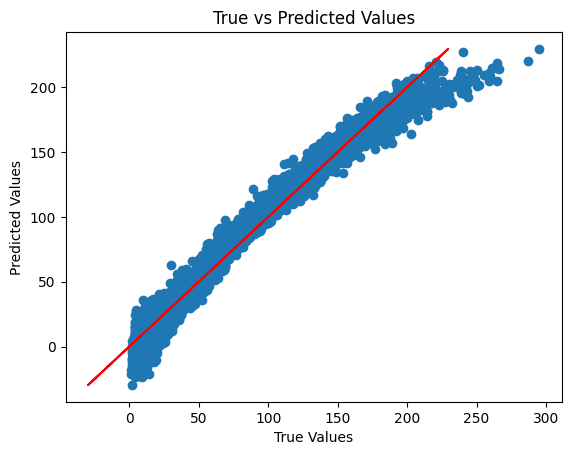

In [17]:
plt.scatter(y_test, y_pred_lr)
plt.plot(y_pred_lr, y_pred_lr,color = 'red')
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted Values")
plt.show()

# KNN as Regressor

In [18]:
mse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    model.fit(x_train, y_train)  
    pred=model.predict(x_test) 
    error = mean_squared_error(y_test,pred)
    mse_val.append(error)
    print('MSE value for k= ' , K , 'is:', error)

MSE value for k=  1 is: 96.14433333333334
MSE value for k=  2 is: 68.88933333333334
MSE value for k=  3 is: 60.21281481481481
MSE value for k=  4 is: 54.047958333333334
MSE value for k=  5 is: 49.98678666666666
MSE value for k=  6 is: 47.601203703703696
MSE value for k=  7 is: 46.90551020408164
MSE value for k=  8 is: 46.336104166666665
MSE value for k=  9 is: 46.36055967078189
MSE value for k=  10 is: 46.208713333333336
MSE value for k=  11 is: 46.75419008264463
MSE value for k=  12 is: 46.63460648148148
MSE value for k=  13 is: 47.788242603550295
MSE value for k=  14 is: 48.77778571428572
MSE value for k=  15 is: 49.234490370370374
MSE value for k=  16 is: 49.88169921875
MSE value for k=  17 is: 50.6318339100346
MSE value for k=  18 is: 51.53054423868313
MSE value for k=  19 is: 52.45353185595568
MSE value for k=  20 is: 53.25341333333333


In [19]:
error = []
for i in range(1, 20):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    accuracy = mean_squared_error(y_test, pred_i)
    error.append(accuracy)

Text(0, 0.5, 'Error')

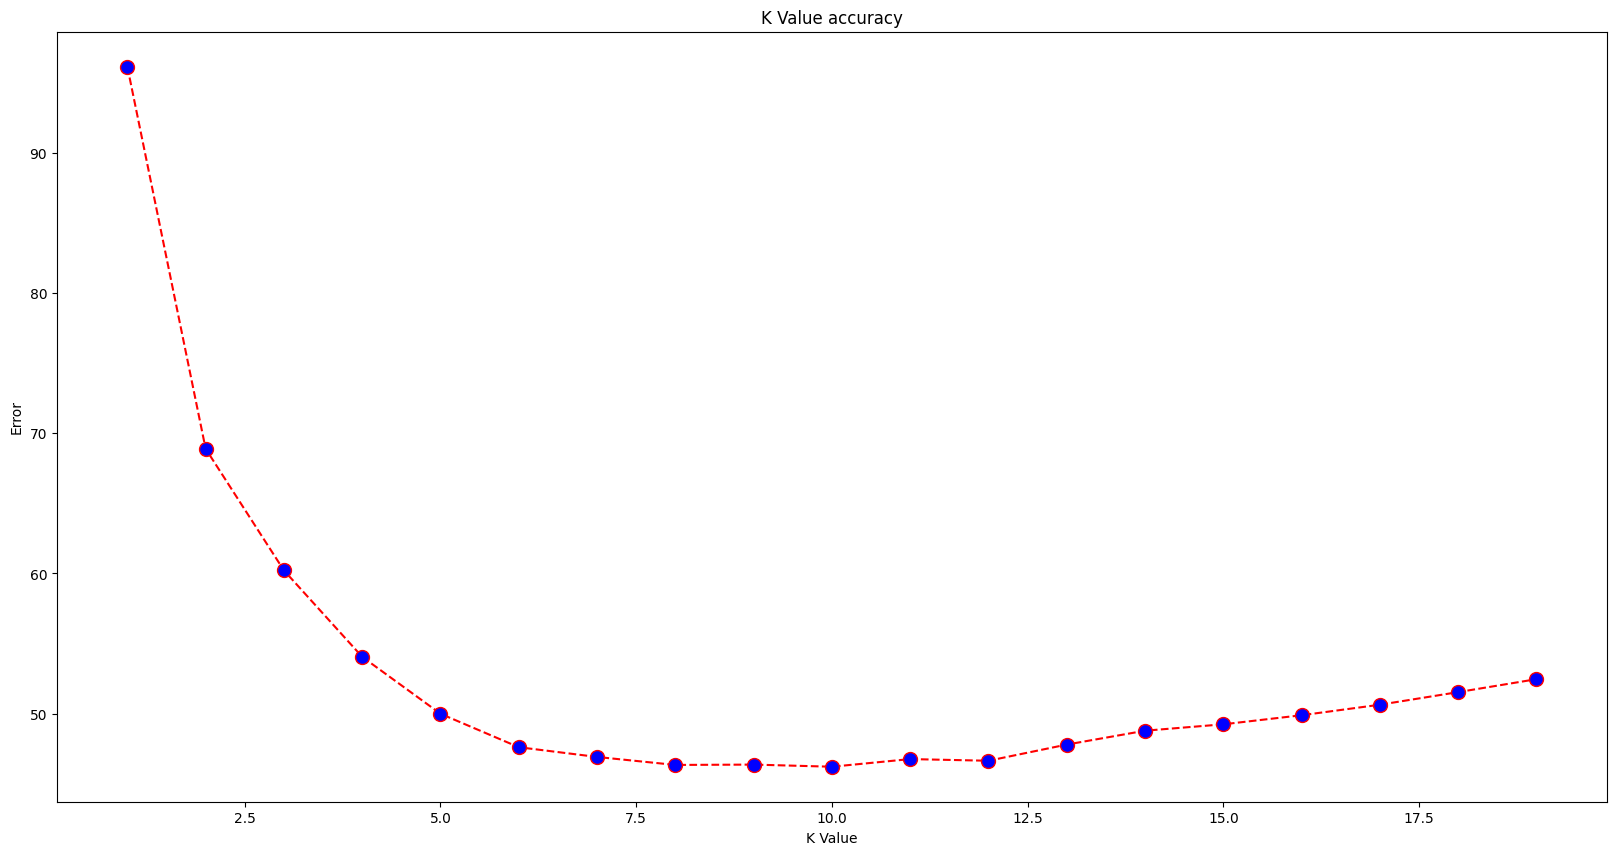

In [20]:
plt.figure(figsize=(20, 10))
plt.plot(range(1, 20), error, color='red', 
         linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
         
plt.title('K Value accuracy')
plt.xlabel('K Value')
plt.ylabel('Error')

In [21]:
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=10)

In [22]:
y_pred_knn = knn.predict(x_test)

In [23]:
score2 = r2_score(y_test, y_pred_knn)
mse2 = mean_squared_error(y_test, y_pred_knn)
mae2 = mean_absolute_error(y_test,y_pred_lr)
print(f'R^2: {score2}')
print(f'MSE: {mse2}')
print("MAE: {}".format(mae2))

R^2: 0.9885502723337267
MSE: 46.208713333333336
MAE: 8.441513553849527


# Comparison

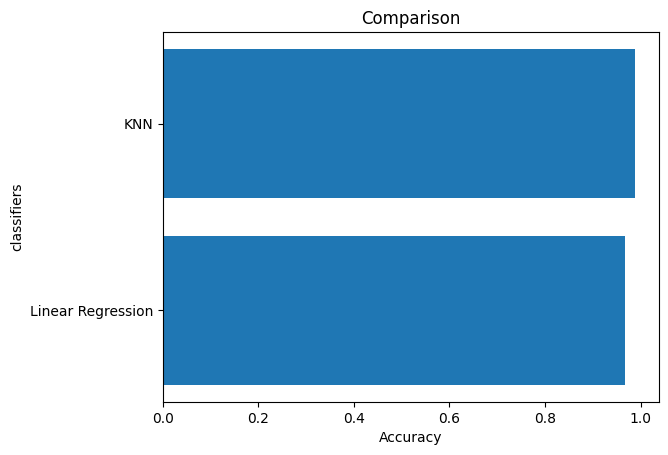

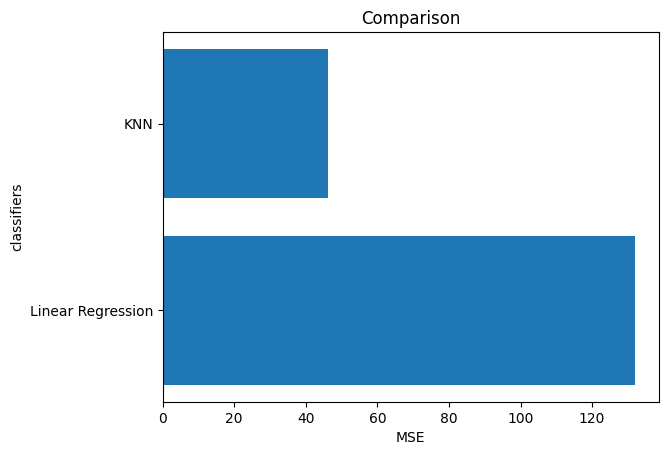

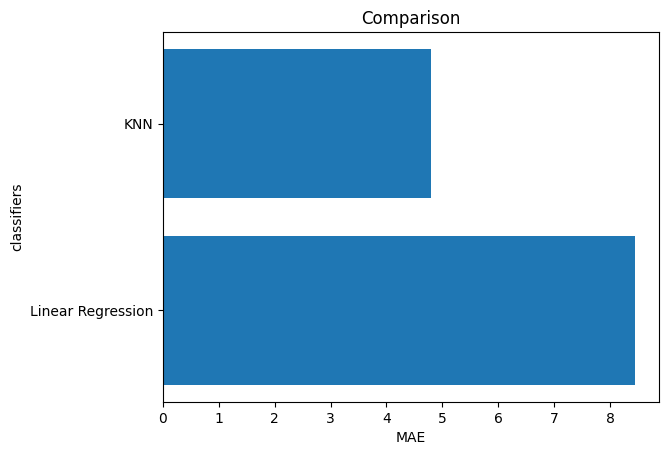

In [24]:
pred=[y_pred_lr,y_pred_knn]
acc=[]
classifiers=["Linear Regression","KNN"]
for i in pred:
    temp= r2_score(y_test, i)
    acc.append(temp)

plt.barh(classifiers, acc)

# Add labels and title
plt.ylabel('classifiers')
plt.xlabel('Accuracy')
plt.title('Comparison')
plt.show()

pred=[y_pred_lr,y_pred_knn]
acc=[]
classifiers=["Linear Regression","KNN"]
for i in pred:
    temp= mean_squared_error (y_test, i)
    acc.append(temp)

plt.barh(classifiers, acc)

# Add labels and title
plt.ylabel('classifiers')
plt.xlabel('MSE')
plt.title('Comparison')
plt.show()

pred=[y_pred_lr,y_pred_knn]
acc=[]
classifiers=["Linear Regression","KNN"]
for i in pred:
    temp= mean_absolute_error(y_test, i)
    acc.append(temp)

plt.barh(classifiers, acc)

# Add labels and title
plt.ylabel('classifiers')
plt.xlabel('MAE')
plt.title('Comparison')
plt.show()

